In [18]:
def rf():
    # Importing libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pickle
    import warnings 
    warnings.simplefilter('ignore')

    # Loading data
    df = pd.read_csv('SolarPrediction.csv')

    data = df

    # Converting UNIX time to datetime object
    data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

    # Setting the right timezone to the datetime object
    data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

    # Extracting date from Data column
    data['Data'] = pd.to_datetime(data['Data']).dt.date

    #Converting Sunrise and Sunset columns into datetime.time objects
    data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
    data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

    #Creating new sunset/sunrise columns featuring also the right date
    data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
    data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

    #Adding approriate timezone
    data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
    data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

    # Setting Date as index, sorting and dropping columns
    data.set_index('Date', inplace = True)

    data.sort_index()

    data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

    # Converting sunrise and sunset times into timestamp
    data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
    data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

    # Creating a column containing the number of daily light hours
    data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

    # Creating column describing current time relative to sunrise/sunset
    data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])

    # Removing non-necessary columns
    data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                         'sunset_time', 'sunrise_time'], inplace = True)

    # Modeling

    df = data

    # Splitting dfset into targets and features
    X = df.drop(columns = 'Radiation')
    y = df.Radiation

    # Splitting df into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling df
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training models
    models = {'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluating performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Printing results
        print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")

        # Plotting predicted vs. actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Solar Radiation')
        plt.ylabel('Predicted Solar Radiation')
        plt.title(name)


Random Forest: R^2=0.929, MAE=32.274, RMSE=84.213
         7009427 function calls (7006977 primitive calls) in 16.132 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100   10.696    0.107   10.696    0.107 {method 'build' of 'sklearn.tree._tree.DepthFirstTreeBuilder' objects}
       35    0.479    0.014    0.479    0.014 {pandas._libs.tslibs.vectorized.ints_to_pydatetime}
   196116    0.348    0.000    1.663    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:928(__getitem__)
  413/407    0.321    0.001    0.760    0.002 {built-in method numpy.array}
   196116    0.236    0.000    1.149    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:1034(_get_value)
   261691    0.222    0.000    0

        3    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351(set_inplace)
      216    0.001    0.000    0.007    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:2160(sum)
      645    0.001    0.000    0.001    0.000 {method 'match' of 're.Pattern' objects}
      313    0.001    0.000    0.001    0.000 <frozen importlib._bootstrap>:404(parent)
      400    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\_config.py:42(set_config)
      461    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local

       22    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:323(_simple_new)
       13    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:4489(_sanitize_column)
       84    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:1348(__add__)
        1    0.000    0.000    0.015    0.015 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:1182(cla)
       43    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSof

       67    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\flags.py:51(allows_duplicate_labels)
      107    0.000    0.000    0.000    0.000 {method 'weekday' of 'datetime.date' objects}
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\markers.py:682(_set_tickleft)
       24    0.000    0.000    0.000    0.000 {method 'transpose' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:5322(set_index)
       22    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8

        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\apply.py:643(columns)
        5    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:1670(external_values)
       20    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1619(<lambda>)
       48    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\font_manager.py:778(get_file)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\P

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:45(<dictcomp>)
        3    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\contextlib.py:426(__exit__)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\copyreg.py:100(__newobj__)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:4820(<genexpr>)
        5    0.000    0.000    0.000    0.000 {method 'values' of 'collections.OrderedDict' objects}
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftware

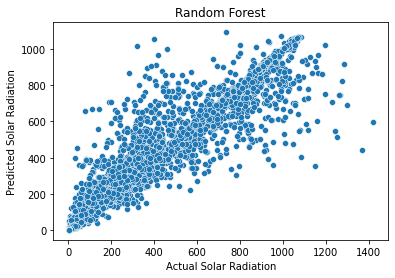

In [19]:
import cProfile,pstats

# Initializing profile class and calling rf function
profiler = cProfile.Profile()
profiler.enable()
rf()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')

# Print the stats report
stats.print_stats()  

In [20]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         7009427 function calls (7006977 primitive calls) in 16.132 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   16.132    8.066 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3325(run_code)
        2    0.000    0.000   16.132    8.066 {built-in method builtins.exec}
        1    0.014    0.014   16.132   16.132 C:\Users\srimo\AppData\Local\Temp\ipykernel_2036\2514051114.py:1(<cell line: 6>)
        1    0.019    0.019   16.119   16.119 C:\Users\srimo\AppData\Local\Temp\ipykernel_2036\3355507027.py:1(rf)
        2    0.001    0.000   11.047    5.523 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\parallel.py:960(__call__)
      202    0.004    0.000   11.045    0.055 C:

      912    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\_config.py:16(_get_threadlocal_config)
     6256    0.001    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\enum.py:678(__new__)
      498    0.001    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\contextlib.py:102(__init__)
        7    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:2916(_construct_result)
     2271    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\

        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2814(__new__)
      125    0.000    0.000    0.000    0.000 {method 'remove' of 'list' objects}
       10    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:3516(_check_indexing_method)
      112    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:484(_ensure_no_complex_data)
       60    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\lines.py:1163(set_mark

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\figure.py:776(_add_axes_internal)
       14    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimelike.py:1878(maybe_infer_freq)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:785(_set_edgecolor)
        2    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\queue.py:34(__init__)
       10    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2

        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\codecs.py:309(__init__)
       48    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\font_manager.py:727(get_family)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:618(get_semantics)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\pyplot.py:201(_get_required_interactive_framework)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
Random Forest: R^2=0.929, MAE=32.274, RMSE=84.213
 
*** Profile stats marshalled to file 'C:\\Users\\srimo\\AppData\\Local\\Temp\\tmp9wrcf1rm'.
Embedding SnakeViz in this document...


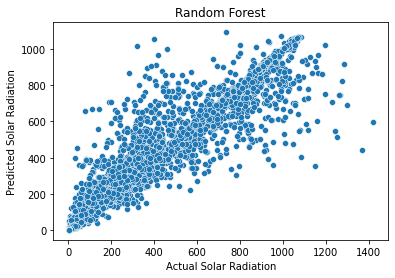

In [21]:
%load_ext snakeviz
%snakeviz rf()